In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from pandasql import *
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
train_df = pd.read_excel('Training Dataset.xlsx', sheetname='Sheet1')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [3]:
train_df.head(5)

,Id,Education Level,Age,Age Range,Employment Status,Gender,Children,Weekly Earnings,Year,Weekly Hours Worked,...,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total
0,1,High School,51,50-59,Unemployed,Female,0,0,2005,0,...,0,0,0,40,180,120,0,0,0,24.000000
1,2,Bachelor,42,40-49,Employed,Female,2,1480,2005,40,...,20,0,120,40,15,15,0,0,0,21.583333
2,3,Master,47,40-49,Employed,Male,0,904,2005,40,...,0,0,15,85,214,199,0,0,0,17.733333
3,4,Some College,21,20-29,Employed,Female,0,320,2005,40,...,0,0,105,30,240,240,0,0,0,26.833333
4,5,High School,49,40-49,Not in labor force,Female,0,0,2005,0,...,0,0,0,35,600,40,0,0,0,23.750000


In [5]:
train_df.describe()

,Id,Age,Children,Weekly Earnings,Year,Weekly Hours Worked,Sleeping,Grooming,Housework,Food & Drink Prep,...,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total
count,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,...,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000
mean,32003.500000,46.260569,0.891291,485.697872,2008.500109,24.508796,522.240368,40.591116,41.246618,34.287879,...,8.498172,1.700606,24.668234,68.652189,288.137925,165.160735,1.293191,0.686201,9.831953,20.615301
std,18477.085002,17.396500,1.146851,639.891303,2.291258,22.274917,135.669820,36.713372,82.483654,53.508507,...,39.001215,20.706929,49.144949,52.639850,206.163299,168.431664,18.539409,7.421383,49.762815,6.194366
min,1.000000,15.000000,0.000000,0.000000,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16002.250000,33.000000,0.000000,0.000000,2007.000000,0.000000,445.000000,10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,30.000000,125.000000,30.000000,0.000000,0.000000,0.000000,15.833333
50%,32003.500000,45.000000,0.000000,240.000000,2009.000000,30.000000,510.000000,30.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,60.000000,250.000000,120.000000,0.000000,0.000000,0.000000,20.500000
75%,48004.750000,59.000000,2.000000,769.000000,2010.750000,40.000000,600.000000,60.000000,55.000000,50.000000,...,0.000000,0.000000,30.000000,90.000000,414.000000,240.000000,0.000000,0.000000,0.000000,24.833333
max,64006.000000,85.000000,12.000000,2885.000000,2012.000000,160.000000,1423.000000,1043.000000,1405.000000,995.000000,...,840.000000,983.000000,879.000000,895.000000,1434.000000,1380.000000,600.000000,505.000000,1127.000000,46.666667


In [6]:
#Getting the data for 2012 to produce the summary of activities
year2012_df = train_df.loc[train_df['Year'] == 2012]
year2012_df = year2012_df.iloc[:, 10:-1]


In [9]:
mean2012 = year2012_df.mean()
mean= list(mean2012)
x_axis = year2012_df.columns

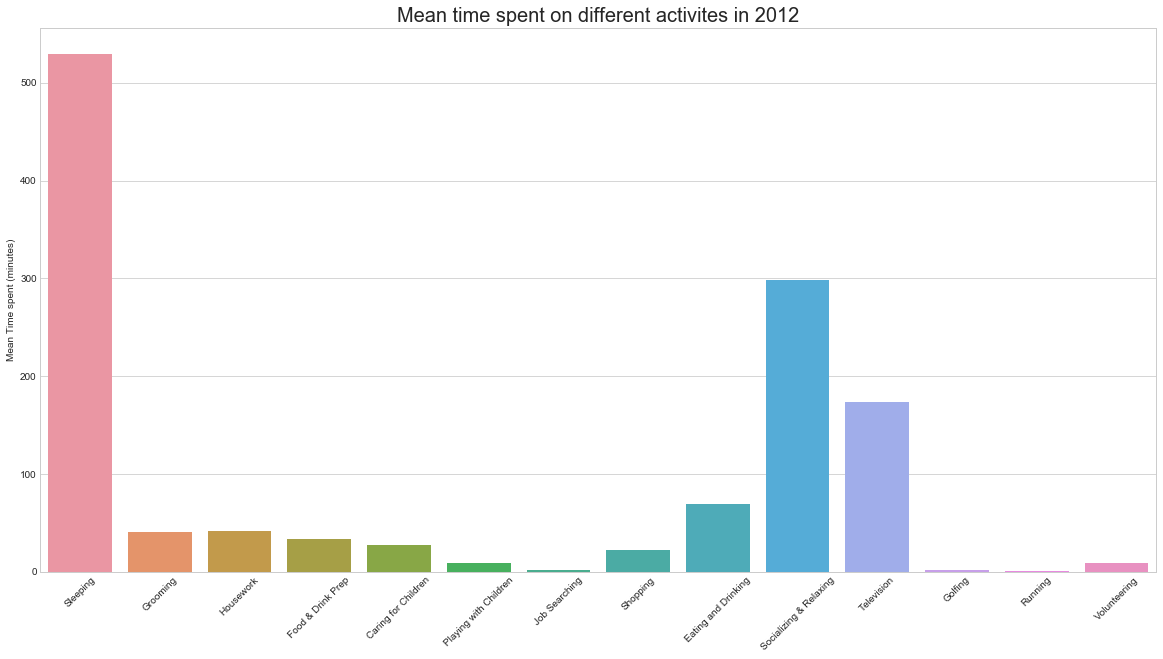

In [10]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
x = sns.barplot(x=x_axis,y=mean)
plt.xticks(rotation=45)
plt.title("Mean time spent on different activites in 2012", fontsize=20)
plt.ylabel("Mean Time spent (minutes)")
fig.savefig('question1.png')

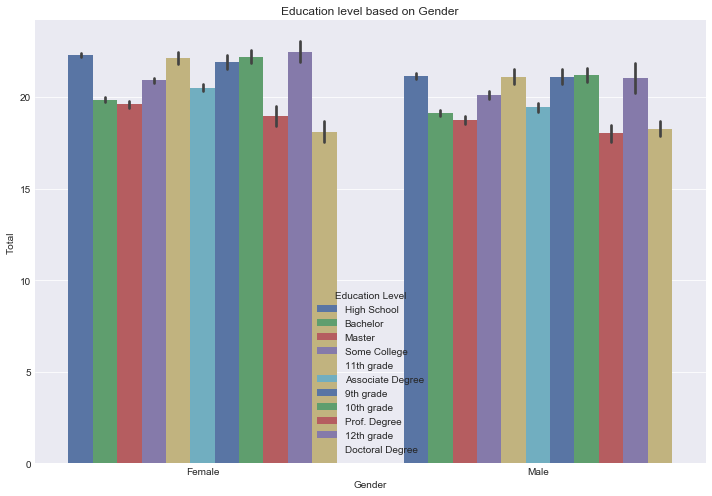

In [15]:
sns.set_style("darkgrid")
sns.color_palette("deep")
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
sns.barplot(x="Gender", hue= "Education Level", y='Total', data=train_df, palette="deep");
plt.title('Education level based on Gender')
plt.tight_layout()

Text(0.5,1,'Education Level based on Age')

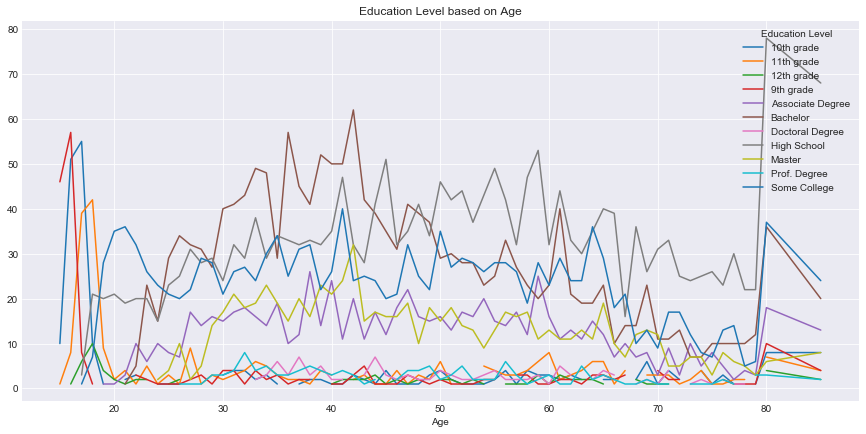

In [16]:
year2012_df2 = train_df.loc[train_df['Year'] == 2012]
fig, ax = plt.subplots(figsize=(15,7))
year2012_df2.groupby(["Age","Education Level"]).count()['Total'].unstack().plot(ax=ax)
plt.title('Education Level based on Age')

Question3: I am assuming that the peple who have children are only playing and spending time with their children. I am considering children care under playing and spending time with children.

In [17]:
parents_df = train_df.loc[train_df['Children'] != 0]


In [18]:
question3_df = (parents_df.mean(), parents_df.std(),parents_df.min(),parents_df.median(),parents_df.max())

In [19]:
question3_df = pd.concat(question3_df,axis=1)
question3_df.columns =  ['mean','std','min','median','max']
question3_df

,mean,std,min,median,max
Age,36.865057,11.894894,15,37.00,85
Age Range,NaN,NaN,0-19,NaN,80+
Caring for Children,62.927025,100.293889,0,15.00,985
Children,1.874421,0.960856,1,2.00,12
Eating and Drinking,65.926105,48.923632,0,60.00,895
Education Level,NaN,NaN,10th grade,NaN,Some College
Employment Status,NaN,NaN,Employed,NaN,Unemployed
Food & Drink Prep,38.225201,55.016268,0,15.00,995
Gender,NaN,NaN,Female,NaN,Male
Golfing,1.002070,16.411671,0,0.00,600


In [23]:
#Mapping gender to sex as category for OLS
parents_df["Sex"] = parents_df["Gender"].map({'Female':1, 'Male': 2}).astype(int)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
#Runing an OLS model using statsmodels to check relation between caring for children and sex
model = smf.OLS(parents_df['Caring for Children'],sm.add_constant(parents_df['Sex']), data=parents_df).fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Caring for Children   R-squared:                       0.024
Model:                             OLS   Adj. R-squared:                  0.024
Method:                  Least Squares   F-statistic:                     763.0
Date:                 Mon, 19 Mar 2018   Prob (F-statistic):          6.54e-166
Time:                         14:03:43   Log-Likelihood:            -1.8306e+05
No. Observations:                30435   AIC:                         3.661e+05
Df Residuals:                    30433   BIC:                         3.661e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.0360      1.729     62.488      0.000     104.647     111.425
Sex          -31.7917      1.151    -27.623      0.000     -34.047     -29.536
==============================================================================
Omnibus:                    15834.145   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           113099.400
Skew:                           2.446   Prob(JB):                         0.00
Kurtosis:                      11.079   Cond. No.                         6.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#Summing all the leisure activities like golfing running etc.
leisure_activities = train_df.iloc[:,17:23]
leisure_activities['leisure'] = train_df['Shopping'] + train_df['Eating and Drinking'] + train_df['Socializing & Relaxing'] + train_df['Television'] + train_df['Golfing'] + train_df['Running']

In [34]:
leisure_activities = pd.concat([leisure_activities, train_df['Weekly Earnings']], axis=1)
X = leisure_activities['Weekly Earnings']
y = leisure_activities['leisure']

In [35]:
#Using statsmodel we find that weekly earning have a negative relationhsip with the time spent on leaire activities
X = sm.add_constant(X)
model = smf.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                leisure   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     3223.
Date:                Mon, 19 Mar 2018   Prob (F-statistic):               0.00
Time:                        14:06:58   Log-Likelihood:            -4.6339e+05
No. Observations:               64006   AIC:                         9.268e+05
Df Residuals:                   64004   BIC:                         9.268e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             606.0476      1.674    362.105      0.000     602.767     609.328
Weekly Earnings    -0.1183      0.002    -56.773      0.000      -0.122      -0.114
==============================================================================
Omnibus:                     8501.618   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13433.301
Skew:                           0.936   Prob(JB):                         0.00
Kurtosis:                       4.237   Cond. No.                     1.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/regression.py:277: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/regression.py:280: RuntimeWarning: divide by zero encountered in log
  _x = np.c_[_x[:, 0], np.log(_x[:, 1])]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/linalg/linalg.py:1728: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


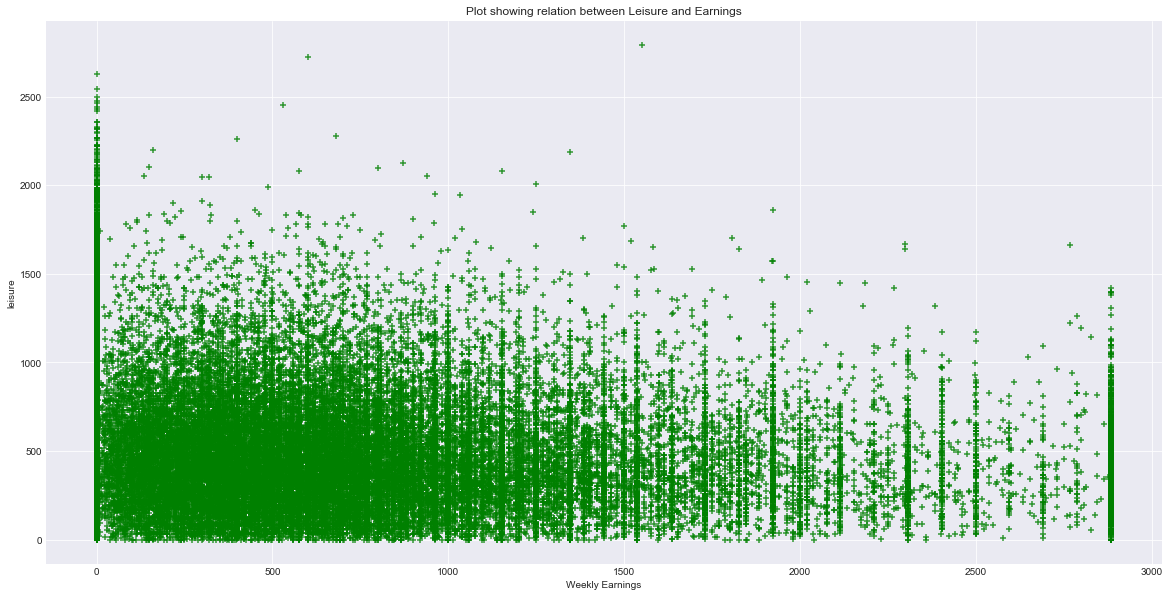

In [38]:
#The plot shows a negative relation between weekly earning and time spent on leisure activities.
X = leisure_activities['Weekly Earnings']
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.regplot(X, y, fit_reg=True,logx=True,color='g',marker='+')
plt.title('Plot showing relation between Leisure and Earnings')
fig.savefig('question4.1.png')
#X.shape

There is a differnce between various generations leisure time as we can see that people with age 80+ spend the most leisure time which makes sense and the busiest people lie in th range from 20-50 years which is ture as people are mostly employed suring this age.

In [39]:
#Primary activity of a person based on their age
train_df['Leisure'] = train_df['Shopping'] + train_df['Eating and Drinking'] + train_df['Socializing & Relaxing'] + train_df['Television'] + train_df['Golfing'] + train_df['Running']
train_df[['Age Range', 'Leisure']].groupby(['Age Range'], as_index=False).mean().sort_values(by='Leisure', ascending=False)

,Age Range,Leisure
7,80+,801.459218
6,70-79,760.470439
5,60-69,675.724708
4,50-59,556.302695
0,0-19,508.848226
1,20-29,486.167272
3,40-49,483.407402
2,30-39,452.423648


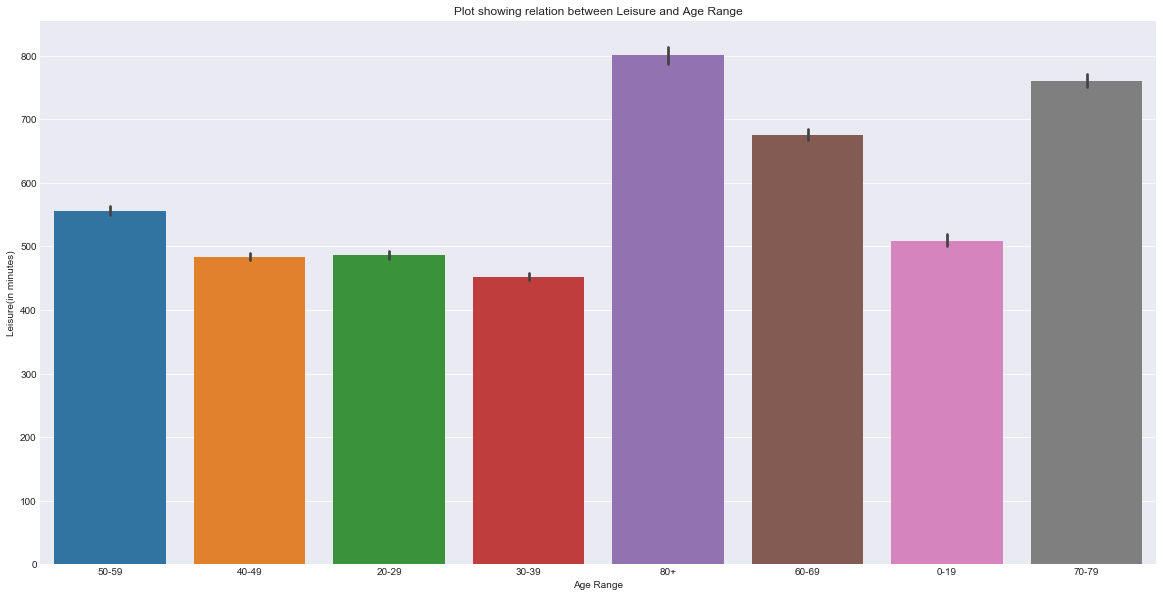

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.set_style('darkgrid')
sns.barplot(train_df['Age Range'], train_df['Leisure'])
plt.title('Plot showing relation between Leisure and Age Range')
plt.ylabel('Leisure(in minutes)')
plt.savefig('question4.2.png')

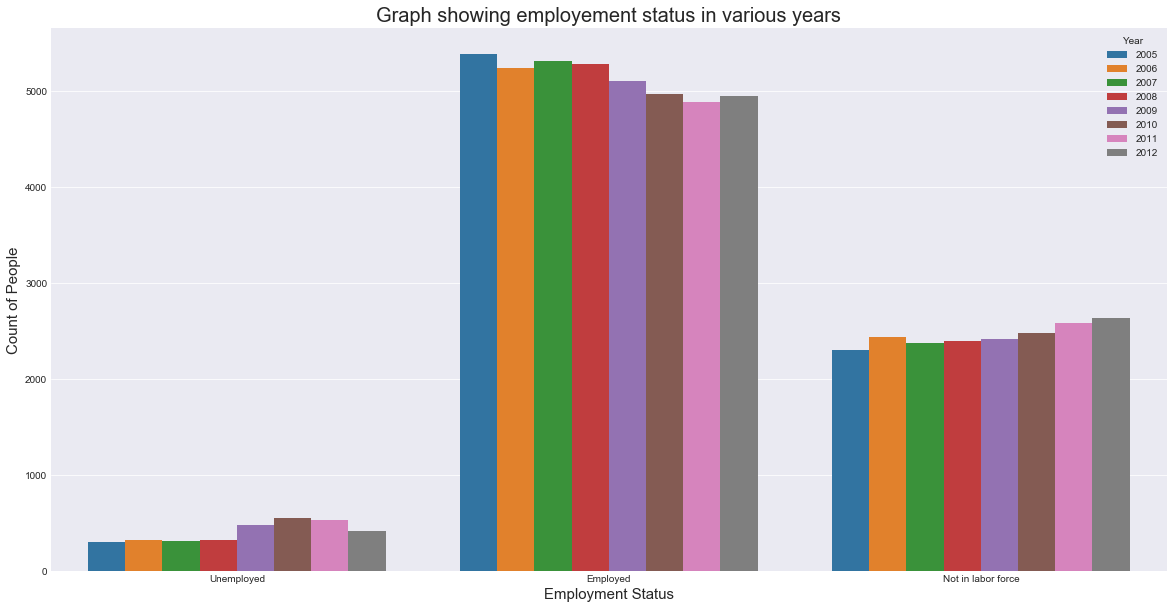

In [41]:
#plot to show how the Employment staus has changed with passing years
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.set_style('darkgrid')
ax = sns.countplot(x="Employment Status", hue="Year", data=train_df)
plt.ylabel('Count of People', fontsize = 15)
plt.xlabel('Employment Status', fontsize = 15)
plt.title('Graph showing employement status in various years', fontsize=20)
plt.savefig('question5.1.png')

In [4]:
#Applying log transformation on the activities data
to_log = ['Weekly Earnings', 'Weekly Hours Worked','Sleeping', 'Grooming','Housework','Food & Drink Prep','Caring for Children',
          'Playing with Children','Job Searching','Shopping','Eating and Drinking','Socializing & Relaxing','Television','Golfing',
          'Running','Volunteering','Children']
df_log = train_df[to_log].applymap(lambda x: np.log(x+2))

In [5]:
df_log.head()

,Weekly Earnings,Weekly Hours Worked,Sleeping,Grooming,Housework,Food & Drink Prep,Caring for Children,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Children
0,0.693147,0.693147,6.717805,4.406719,5.023881,3.850148,0.693147,0.693147,0.693147,0.693147,3.737670,5.204007,4.804021,0.693147,0.693147,0.693147,0.693147
1,7.301148,3.737670,6.218600,2.484907,5.023881,4.127134,5.905362,3.091042,0.693147,4.804021,3.737670,2.833213,2.833213,0.693147,0.693147,0.693147,1.386294
2,6.809039,3.737670,6.177944,4.276666,1.098612,0.693147,0.693147,0.693147,0.693147,2.833213,4.465908,5.375278,5.303305,0.693147,0.693147,0.693147,0.693147
3,5.774552,3.737670,6.561031,4.204693,4.521789,4.919981,0.693147,0.693147,0.693147,4.672829,3.465736,5.488938,5.488938,0.693147,0.693147,0.693147,0.693147
4,0.693147,0.693147,6.156979,4.127134,5.332719,2.833213,0.693147,0.693147,0.693147,0.693147,3.610918,6.400257,3.737670,0.693147,0.693147,0.693147,0.693147


In [6]:
con = ['Education Level','Age Range','Employment Status','Gender']
test_log = train_df[con]
test_log.head()

,Education Level,Age Range,Employment Status,Gender
0,High School,50-59,Unemployed,Female
1,Bachelor,40-49,Employed,Female
2,Master,40-49,Employed,Male
3,Some College,20-29,Employed,Female
4,High School,40-49,Not in labor force,Female


In [7]:
new_df = pd.concat([test_log,df_log],axis=1)

In [9]:
new_df = new_df[['Age Range','Education Level','Gender','Weekly Earnings','Weekly Hours Worked','Sleeping','Grooming','Housework',
               'Food & Drink Prep','Caring for Children','Playing with Children','Job Searching','Shopping','Eating and Drinking','Socializing & Relaxing','Television','Golfing',
          'Running','Volunteering','Children','Employment Status']]

In [10]:
new_df["Gender"] = new_df["Gender"].map({'Female':1, 'Male': 0}).astype('category')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_df['Education Level'] = le.fit_transform(new_df['Education Level'])
new_df['Education Level'].astype('category')
le = LabelEncoder()
new_df['Age Range'] = le.fit_transform(new_df['Age Range'])
new_df['Age Range'].astype('category')

0        4
1        3
2        3
3        1
4        3
5        3
6        3
7        1
8        2
9        1
10       2
11       3
12       2
13       1
14       7
15       5
16       2
17       2
18       4
19       3
20       5
21       0
22       3
23       0
24       1
25       5
26       2
27       3
28       2
29       2
        ..
63976    4
63977    5
63978    4
63979    7
63980    5
63981    4
63982    4
63983    3
63984    2
63985    4
63986    3
63987    0
63988    1
63989    2
63990    3
63991    3
63992    2
63993    4
63994    2
63995    4
63996    2
63997    1
63998    4
63999    3
64000    4
64001    4
64002    2
64003    2
64004    4
64005    5
Name: Age Range, Length: 64006, dtype: category
Categories (8, int64): [0, 1, 2, 3, 4, 5, 6, 7]

In [252]:
new_df.columns

Index(['Age Range', 'Education Level', 'Gender', 'Weekly Earnings',
       'Weekly Hours Worked', 'Sleeping', 'Grooming', 'Housework',
       'Food & Drink Prep', 'Caring for Children', 'Playing with Children',
       'Job Searching', 'Shopping', 'Eating and Drinking',
       'Socializing & Relaxing', 'Television', 'Golfing', 'Running',
       'Volunteering', 'Children', 'Employment Status'],
      dtype='object')

In [11]:
data = new_df.iloc[:,0:20]
target = new_df['Employment Status']
data.columns

Index(['Age Range', 'Education Level', 'Gender', 'Weekly Earnings',
       'Weekly Hours Worked', 'Sleeping', 'Grooming', 'Housework',
       'Food & Drink Prep', 'Caring for Children', 'Playing with Children',
       'Job Searching', 'Shopping', 'Eating and Drinking',
       'Socializing & Relaxing', 'Television', 'Golfing', 'Running',
       'Volunteering', 'Children'],
      dtype='object')

In [12]:
#Split the dataset into test and training 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

In [13]:
#Run random forest algorithm and determine its accuracy which came out to be approx 94%
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
labels = data.columns
# fit an Extra Trees model to the data
forest = RandomForestClassifier(n_estimators=500,max_features=None)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
result = forest.score(X_test, y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 94.766%


In [14]:
#Make the confusion matrix to check how correct the algorithm has been
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[12207,   148,     9],
       [    3,  5771,   136],
       [    1,   708,   219]])